# 0. 데이터 분석

## Interdisciplinary scientific field: Data Anlysis
* Domain Knowledge
* Statistics
* Mathematics
* Computer Science

## 경험적 모델 설계(emprical model building)
* 논리적이만 가설적인 체계
* 설정(specification)
* 모형 추정(estimation) 진단적 검정(diagnostic testing) & 접합성 검정(test for overall-fit)
* 이론의 개선
* 최적 모형의 선별(model selection)

## 모델링(Modeling)

1. 이론
   * 결정론적(deterministic)
   * 완전히 구체화 되지 않은 함수 형태
   * ex) $C = f(Y)$ 



2. 데이터 수집
   * 데이터 특징(the feautres of data): cross-section/panel/time-series, stationary/nonstationary
  
   
   
3. 설정(specification)
   * 확률적(stochastic): 오차(error term, distrubance term)
   * 선형(linearity)
   * ex) $C = \alpha + \beta Y + u$

4. 모델 추정(estimation of the model)
   * 추정 방법: 최소자승법(least squared error; LSE), 일반화최소제곱(Generalized least squared error; GLSE), 최대우도법(Maximum likelihood method), 일반화된적률계산(generalized method of moments; GMM)
   
   
   
5. 진단(diagnostics)
   * 추정 모델의 평가
   * 진단 테스트에 통과하지 못할 경우 가설 및 이론을 재확인 모델 재구성
   
   
   
6. 모델의 함의
   * 모델의 결과에 대한 해석

# 회귀분석(Regression Analysis)

# 1. 표준선형회귀모델(Standard Linear Regression Model)

### 회귀 모델(regression model)
* 모집단(population) vs 표본세상(sampling world)
* 순행(progress) vs regress(역행, 회귀)
   * 통계: 통계적 추론

### 변수들(variables)의 분류
* 회귀 분석에서의 변수들의 비대칭적 취급(treatement)
    * 종속변수(dependent/explained varible, regressand, etc.)
    * 독립변수(independent/explanatory variable, regressors or covariates)
    * 내생성(endogenous) vs exogenous(외생) 변수

### 모형 가정 (BLUE: Best Linear Unbiased Estimator)
: 불편성(Unbiased), 일치성(Consistency), 효율성(Efficiency)
1. 선형성: 선형(linearity)
2. 독립성: full rank: 독립변수들간에 정확한 선형의 관계가 없음, 설명변수 들은 결정변수(exogeneity) 
3. 등분산성(homoscedasticity)과 비자기상관(nonautocorrealtion)
4. 정규성(Normality): 오차항의 정규분포(independent and identically distributed; iid, $e_i = iid  Normal(0, \sigma ^2)$ 

### 표준선형회귀모델의 특성(properties)

*  $E(\varepsilon | X) = 0$ --> $E(y|X) = X \beta$ : y의 조건부 평균 함수(conditional mean function of y)

* y의 모집단 분해(population decompistion of y)
    * $y=X\beta + \varepsilon =$
    * $ E(y|X) + \varepsilon =$
    * $시스템 부분(systematic part) + 확률적 부분(stochastic part)$
    
* $V(\varepsilon|X) = \sigma^2 \mathbf{I}$ -> $V(y|X) = \sigma^2 \mathbf{I}$
    * 참고) 분산: $S^2= \frac{1}{n-1} \sum_{i = 1}^N (x_i - \bar{x})^2$ 
    * 분산의 기댓값: $E(S^2) = E(\frac{1}{n-1} \sum_{i = 1}^N (x_i - \bar{x})^2) $ 

In [10]:
library(ggplot2)
library(caret)
library(ISLR)

data(Wage)

In [11]:
summary(Wage)

      year           age                     maritl           race     
 Min.   :2003   Min.   :18.00   1. Never Married: 648   1. White:2480  
 1st Qu.:2004   1st Qu.:33.75   2. Married      :2074   2. Black: 293  
 Median :2006   Median :42.00   3. Widowed      :  19   3. Asian: 190  
 Mean   :2006   Mean   :42.41   4. Divorced     : 204   4. Other:  37  
 3rd Qu.:2008   3rd Qu.:51.00   5. Separated    :  55                  
 Max.   :2009   Max.   :80.00                                          
                                                                       
              education                     region               jobclass   
 1. < HS Grad      :268   2. Middle Atlantic   :3000   1. Industrial :1544  
 2. HS Grad        :971   1. New England       :   0   2. Information:1456  
 3. Some College   :650   3. East North Central:   0                        
 4. College Grad   :685   4. West North Central:   0                        
 5. Advanced Degree:426   5. South Atla

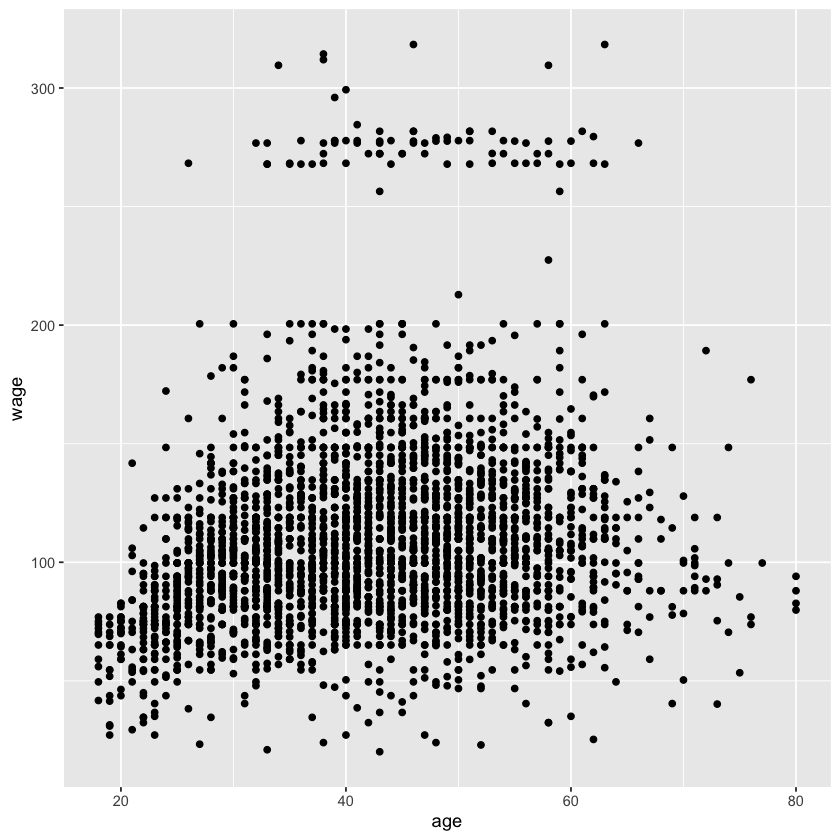

In [24]:
qplot(age, wage, data = Wage)

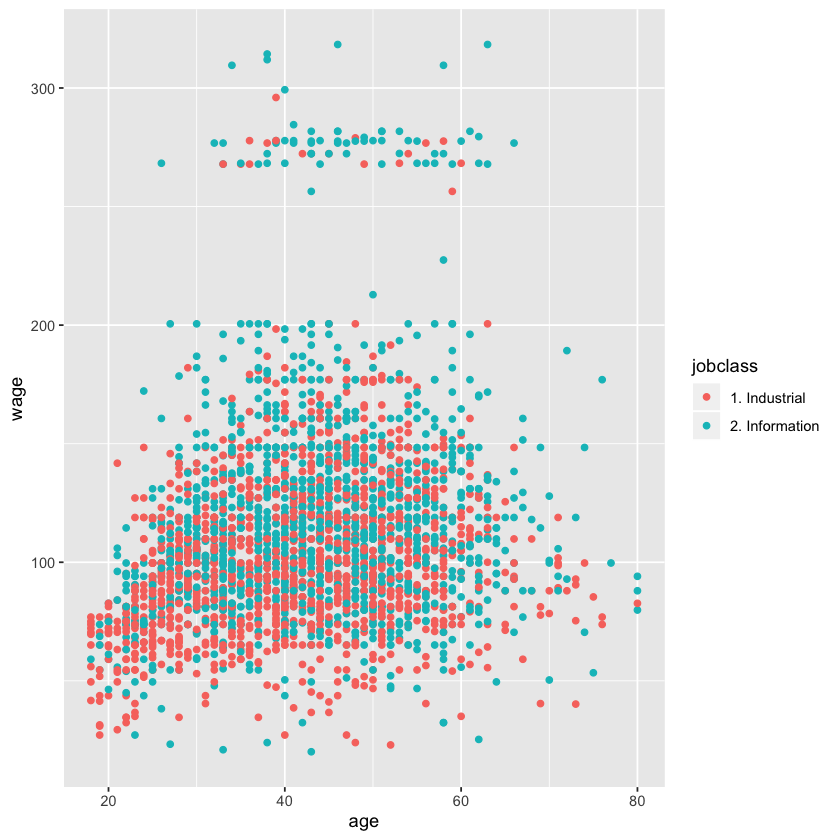

In [25]:
qplot(age, wage, color = jobclass, data = Wage)

In [38]:
model = lm(wage ~ age, data =Wage)
summary(model)


Call:
lm(formula = wage ~ age, data = Wage)

Residuals:
     Min       1Q   Median       3Q      Max 
-100.265  -25.115   -6.063   16.601  205.748 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 81.70474    2.84624   28.71   <2e-16 ***
age          0.70728    0.06475   10.92   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.93 on 2998 degrees of freedom
Multiple R-squared:  0.03827,	Adjusted R-squared:  0.03795 
F-statistic: 119.3 on 1 and 2998 DF,  p-value: < 2.2e-16


In [37]:
confint(model)

,2.5 %,97.5 %
(Intercept),76.1239501,87.2855208
age,0.5803148,0.8342371


In [40]:
model


Call:
lm(formula = wage ~ age, data = Wage)

Coefficients:
(Intercept)          age  
    81.7047       0.7073  


In [52]:
new_age = 10
81.7047 + 0.7073*new_age

[1] 88.7777

In [62]:
new_data <- data.frame(age = c(10, 20, 30))
new_data

age
<dbl>
10
20
30


In [63]:
predict(model, newdata = new_data)

1         2         3 
 88.77749  95.85025 102.92301

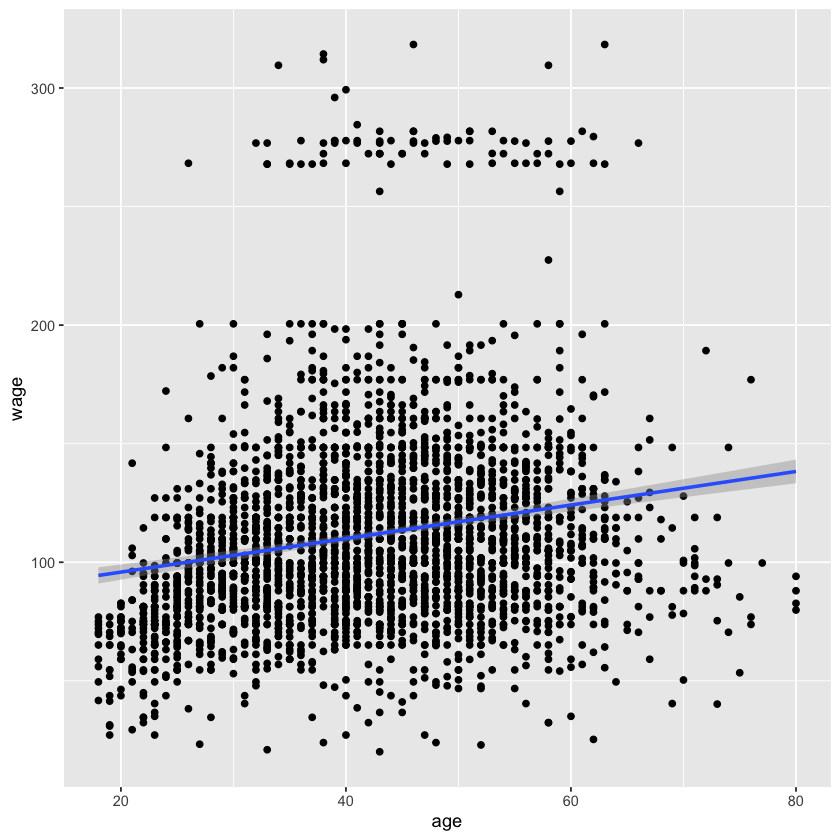

In [56]:
qplot(age, wage, data = Wage) +
geom_smooth(method = 'lm', formula = y ~ x)

In [71]:
wage_hat <- predict(model, newdata = new_data)
new_pred<- data.frame(age = new_data, wage = wage_hat)
new_pred

age,wage
<dbl>,<dbl>
10,88.77749
20,95.85025
30,102.92301


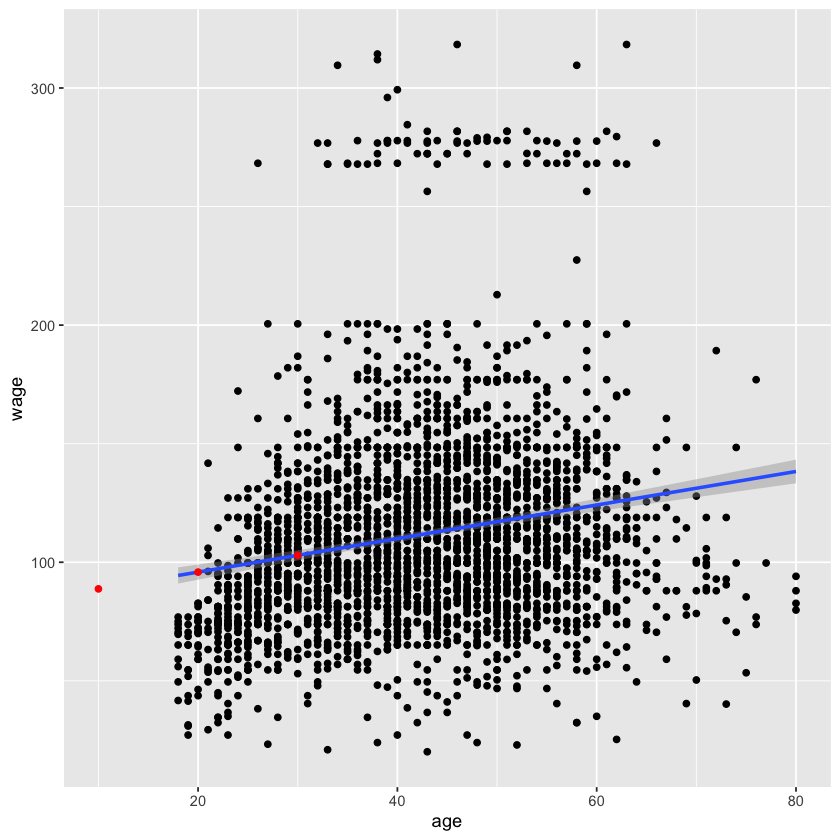

In [73]:
qplot(age, wage, data = Wage) +
geom_smooth(method = 'lm', formula = y ~ x) + 
geom_point(data = new_pred, aes(age, wage), col = 'red')

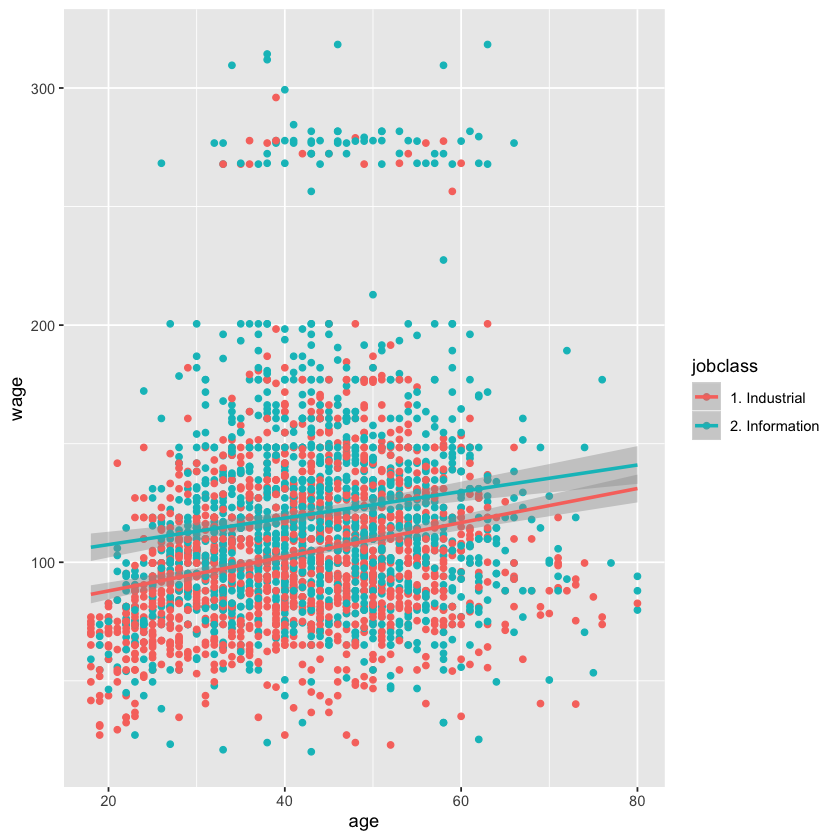

In [74]:
qplot(age, wage, color = jobclass, data = Wage) +
geom_smooth(method = 'lm', formula = y ~ x)

### E(y|x) : 특정 값 x가 주어 졌을때 y의 조건부평균
* E(wage|age,jobclass = industrial)
* E(wage|age,jobclass = information)

### 모형 모수
* 회귀 분석의 자료를 분석하는데 있어서 
* 회귀직선의 절편(intercept): 모수 $\beta_0$ 추정 <- 모형에서 해석의 여지가 별로 없는 회귀항(regression term)이며, 원래 모형을 통해 적용하려는 범위를 벗어남
* 회귀직선의 기울기(slope): 모수 $\beta_1$ 추정

* 모수들(parameters) = 회귀계수(regression coefficients)
* 모수 추정값(estimates)은 전체 분석과정에서 해석할 때 고려

In [17]:
model = lm(wage ~ education, data = Wage)
model


Call:
lm(formula = wage ~ education, data = Wage)

Coefficients:
                (Intercept)          education2. HS Grad  
                      84.10                        11.68  
   education3. Some College     education4. College Grad  
                      23.65                        40.32  
education5. Advanced Degree  
                      66.81  


In [18]:
summary(model)


Call:
lm(formula = wage ~ education, data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-112.31  -19.94   -3.09   15.33  222.56 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   84.104      2.231  37.695  < 2e-16 ***
education2. HS Grad           11.679      2.520   4.634 3.74e-06 ***
education3. Some College      23.651      2.652   8.920  < 2e-16 ***
education4. College Grad      40.323      2.632  15.322  < 2e-16 ***
education5. Advanced Degree   66.813      2.848  23.462  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 36.53 on 2995 degrees of freedom
Multiple R-squared:  0.2348,	Adjusted R-squared:  0.2338 
F-statistic: 229.8 on 4 and 2995 DF,  p-value: < 2.2e-16


In [20]:
unique(Wage$education)

[1] 1. < HS Grad       4. College Grad    3. Some College    2. HS Grad        
[5] 5. Advanced Degree
5 Levels: 1. < HS Grad 2. HS Grad 3. Some College ... 5. Advanced Degree

# OLSE (Ordinary Least Squares Estimation)
: 최소자승추정

* the (population) regression equation:
$y = X \beta + u $

* X(the design matrix): full column rank로 되어있는 알려진 상수 행렬(matrix)
* u(the error vector): $E(u) = 0$, $V(u) = \sigma^2 \mathbf{I}_n$

## 변수들과 파라미터들

$\mathbf y \equiv \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix}$


$\mathbf X \equiv 
\begin{bmatrix} 1 & x_{2,1} & \cdots & x_{K,1} \\
1 & x_{2,2} & \cdots & x_{K,2} \\
\vdots & \vdots &\ddots &\vdots \\
1 & x_{2,N} & \cdots & x_{K,N} \end{bmatrix} \equiv \begin{bmatrix} \mathbf X_1' \\ \mathbf X_2' \\ \vdots \\ \mathbf X_N' \end{bmatrix}$ 


$\mathbf u \equiv \begin{bmatrix} u_1 \\ u_2 \\ \vdots \\ u_N \end{bmatrix}$


$\mathbf \beta \equiv \begin{bmatrix} \beta_1 \\ \beta_2 \\ \vdots \\ \beta_N \end{bmatrix}$

$ \sigma^2 $

### 최소자승추정(LSE)

$(\hat \beta, \hat{{\sigma}^2})$ 


$ \underset{(\beta, \sigma^2)} {min} \mathbf\mu'\mu = (y- \mathbf X \mathbf\beta)'(y - \mathbf X \mathbf \beta) = S(\mathbf \beta)$

1차 미분(1st order condition) : $0 = \frac{\partial S(\mathbf \beta)}{\partial \mathbf \beta}|_{\beta = \hat \beta} $

$0 = \mathbf X' (\mathbf y - \mathbf X \mathbf{\hat\beta}) = \mathbf X' \mathbf {\hat u}$ : K개의 변수가 있으므로 K개의 식

$\mathbf{X' X\hat{\beta}= X'y}$


$\mathbf{\hat{\beta} = (X'X)^{-1}X'y}$ : (X'X는 역행렬이 유일하게 존재, X: full column rank)$


$\mathbf{\hat y }\equiv \mathbf{X \hat\beta}$ : (O) fitted regression equation, 


$\mathbf{\hat u }\equiv \mathbf{y-\hat y} = y - X\hat\beta$ : (O)LS 잔차(residual)

* Population decomposition
$\mathbf{y = X\beta + u = E(y) + u}$ = (systematic part) + (non-systematic part)


* Sampling decompisition
$\mathbf{y = X\hat\beta + \hat u = \hat y + \hat u}$

In [6]:
# install.packages("datarium")

In [7]:
data("marketing", package = "datarium")

In [9]:
head(marketing, 4)

youtube,facebook,newspaper,sales
<dbl>,<dbl>,<dbl>,<dbl>
276.12,45.36,83.04,26.52
53.40,47.16,54.12,12.48
20.64,55.08,83.16,11.16
181.80,49.56,70.20,22.20


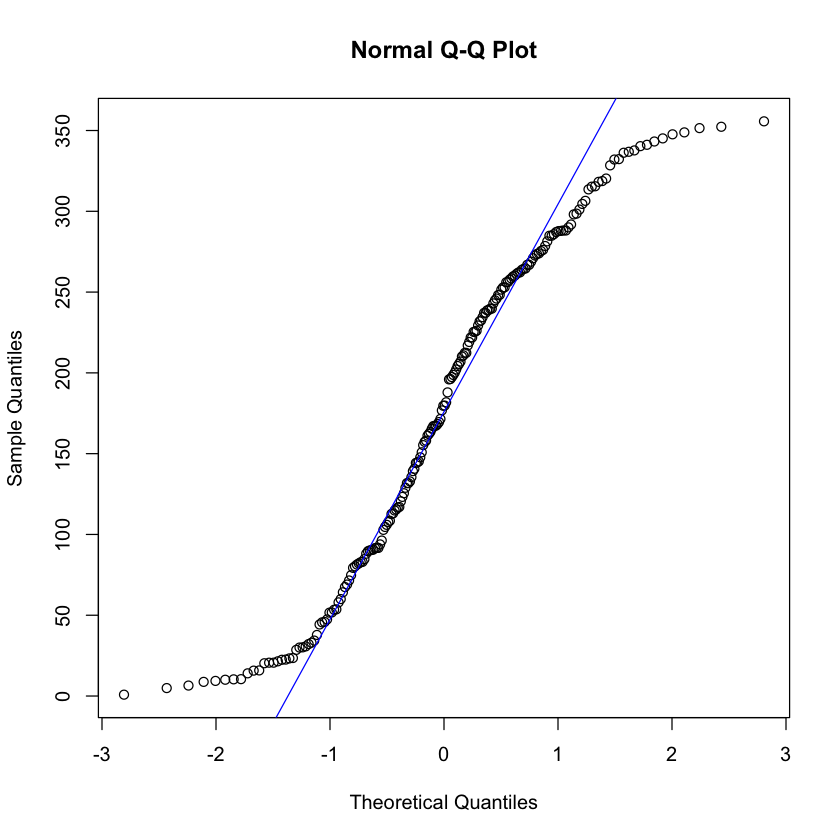

In [29]:
qqnorm(marketing$youtube)
qqline(marketing$youtube, col = "blue")

In [34]:
install.packages("car")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


[1] 102  43

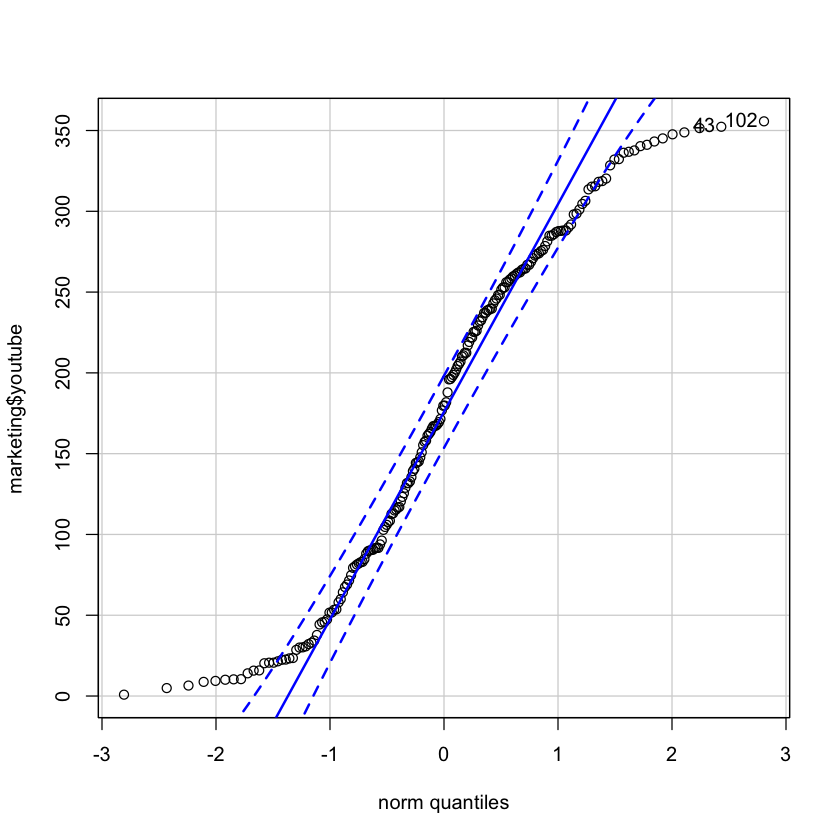

In [36]:
library(car)
qqPlot(marketing$youtube)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


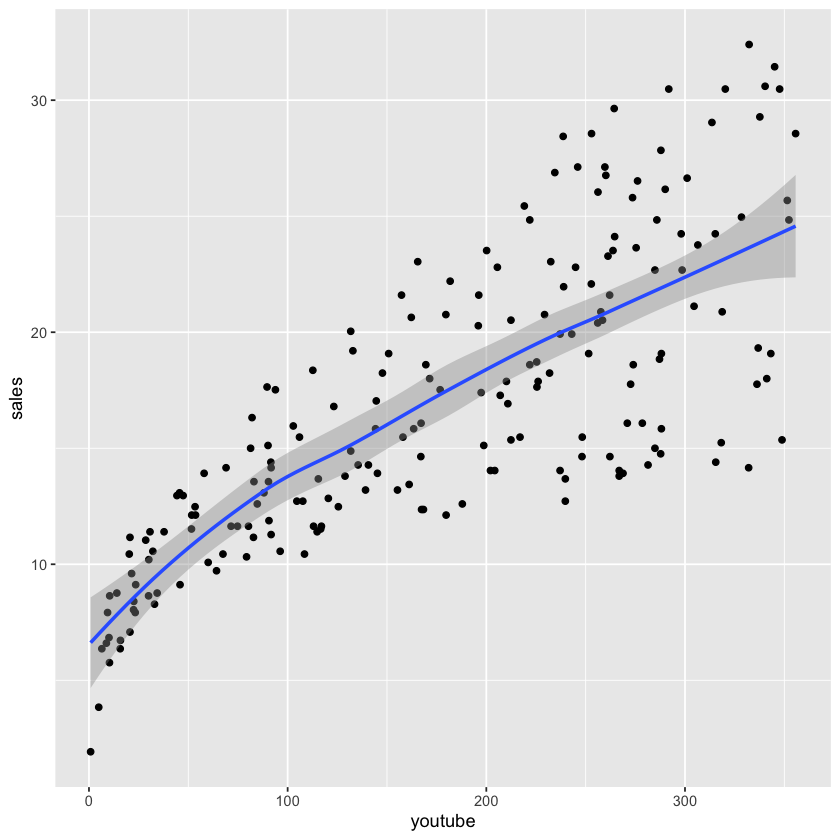

In [12]:
library(ggplot2)

ggplot(marketing, aes(x = youtube, y = sales)) + 
geom_point() + stat_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


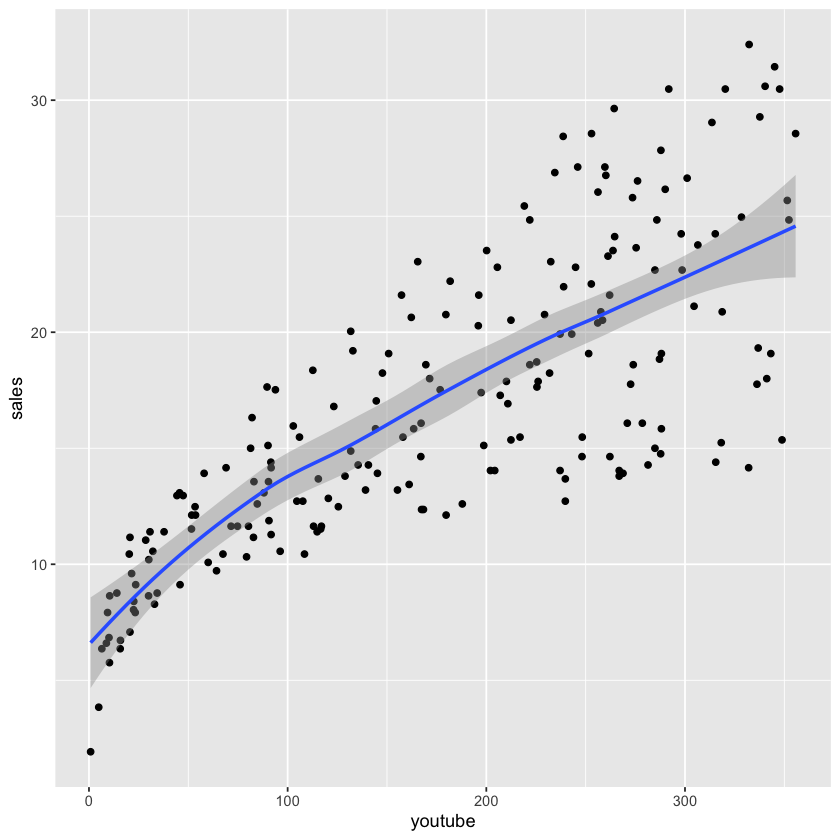

In [17]:
ggplot(marketing, aes(x = youtube, y = sales)) + 
geom_point() + stat_smooth()

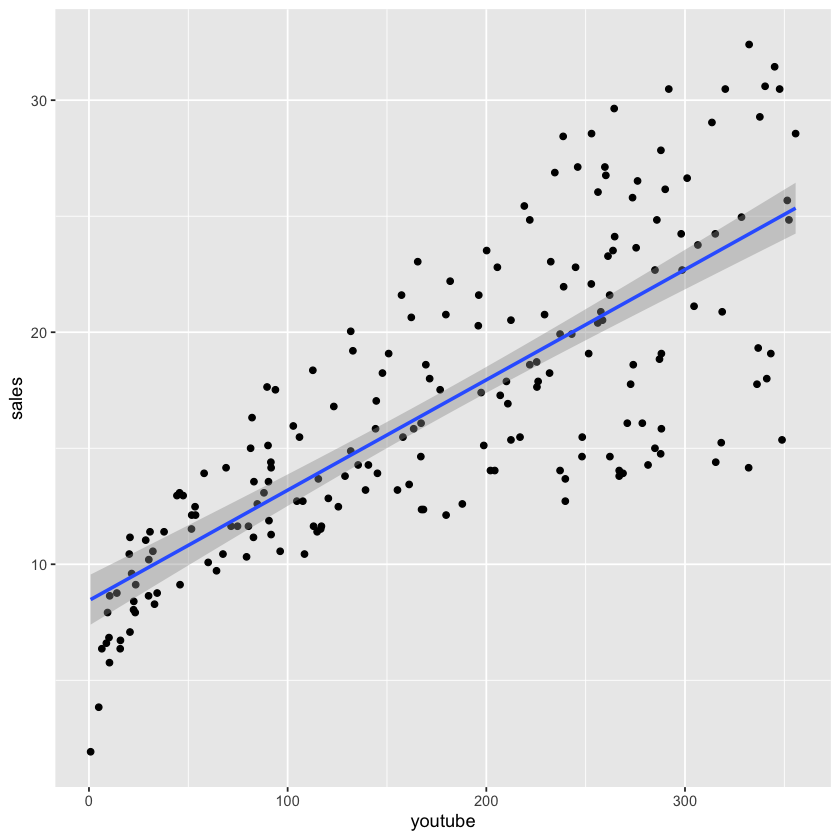

In [18]:
ggplot(marketing, aes(x = youtube, y = sales)) + 
geom_point() + stat_smooth(method = lm)

In [19]:
model <- lm(sales ~ youtube, data = marketing)
model


Call:
lm(formula = sales ~ youtube, data = marketing)

Coefficients:
(Intercept)      youtube  
    8.43911      0.04754  


In [20]:
summary(model)


Call:
lm(formula = sales ~ youtube, data = marketing)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0632  -2.3454  -0.2295   2.4805   8.6548 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.439112   0.549412   15.36   <2e-16 ***
youtube     0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.91 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


In [22]:
#  t = (b - 0)/SE(b)
# the 95% confidence interval for the coefficient b1 is defined as b1 +/- 2*SE(b1)

In [23]:
confint(model)

,2.5 %,97.5 %
(Intercept),7.35566312,9.52256140
youtube,0.04223072,0.05284256


In [25]:
# The Residual Standard Error (RSE).
sigma(model)*100/mean(marketing$sales)

[1] 23.23877

In [26]:
# RSE: Closer to zero the better
# R-Squared: Higher the better
# F-statistic: Higher the better